In [1]:
# Python program for the above approach
import dlib
import networkx as nx
import random
import numpy
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from numpy.random import default_rng
from networkx.drawing.nx_agraph import graphviz_layout
import copy
import numpy as np

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [3]:
# Function to find out the best
# assignment of people to jobs so that
# total cost of the assignment is minimized
def minCost(arr):
  print("---------")
  print(arr)
  print("---------")

	# Call the max_cost_assignment() function
	# and store the assignment
  min_arr = copy.deepcopy(arr)
  for i in range(len(arr)):
    for j in range(len(arr)):
      min_arr[i][j] = arr[i][j] *-1
  assignment = dlib.max_cost_assignment(min_arr)
  for i in range(len(min_arr)):
    print(f"{i} -> {min_arr[i][assignment[i]] * -1}")

  print(assignment)
	# Print the optimal cost
  print(f"Custo total -> {dlib.assignment_cost(min_arr, assignment) * -1}")

  return assignment
# Driver Code

# Given 2D array
input = '''
116,78,83,69,47,72,97,112
124,86,91,67,71,80,105,120
116,78,83,69,63,72,97,112
132,94,99,85,79,54,113,128
124,86,91,49,71,80,105,120
120,82,87,63,67,76,101,116
52,44,79,65,59,68,93,108
54,58,63,49,43,52,53,92
'''
m = []
for item in input.split():
  x = item.split(',')
  x = [int(j) for j in x]
  m.append(x)
print(m)
arr = dlib.matrix(m)

# Function Call
minCost(arr)

[[116, 78, 83, 69, 47, 72, 97, 112], [124, 86, 91, 67, 71, 80, 105, 120], [116, 78, 83, 69, 63, 72, 97, 112], [132, 94, 99, 85, 79, 54, 113, 128], [124, 86, 91, 49, 71, 80, 105, 120], [120, 82, 87, 63, 67, 76, 101, 116], [52, 44, 79, 65, 59, 68, 93, 108], [54, 58, 63, 49, 43, 52, 53, 92]]
---------
116  78  83  69  47  72  97 112 
124  86  91  67  71  80 105 120 
116  78  83  69  63  72  97 112 
132  94  99  85  79  54 113 128 
124  86  91  49  71  80 105 120 
120  82  87  63  67  76 101 116 
 52  44  79  65  59  68  93 108 
 54  58  63  49  43  52  53  92
---------
0 -> 47.0
1 -> 86.0
2 -> 83.0
3 -> 54.0
4 -> 49.0
5 -> 116.0
6 -> 52.0
7 -> 53.0
[4, 1, 2, 5, 3, 7, 0, 6]
Custo total -> 540.0


[4, 1, 2, 5, 3, 7, 0, 6]

In [4]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        weight = random.randint(3,10)
        G.add_edge(*random_edge, weight= weight, len= weight)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [5]:
def color_graph_by_type(n, n_cars, n_boxes, n_charges=0, n_delivery=1):
  rng = default_rng()
  numbers = rng.choice(n, size=(n_cars+n_boxes+n_charges+n_delivery), replace=False)
  map = list(numbers)
  print(map)
  color_map = []
  dic_type = dict()
  dic_mass = dict()
  dic_autonomy = dict()
  cars = []
  boxes = []
  delivery = 0
  for i in range(n):
    if i in map and map.index(i) < n_cars:
      color_map.append('green')
      cars.append(i)
      dic_type[i] = 'car'

      dic_autonomy[i] = random.randint(1,6) * n
    elif i in map and map.index(i) == n_cars:
      color_map.append('yellow')
      delivery = i
      dic_type[i] = 'delivery'
    elif i in map:
      color_map.append('red')
      boxes.append(i)
      dic_type[i] = 'box'
      dic_mass[i] = random.randint(1,50)
    else:
      color_map.append('lightblue')
      dic_type[i] = 'nothing'

  print(color_map)
  nx.set_node_attributes(G, dic_type, 'type')
  nx.set_node_attributes(G, dic_mass, 'mass')
  nx.set_node_attributes(G, dic_autonomy, 'autonomy')

  gi = list(G.nodes(data=True))
  print(f"-{gi}-")
  return color_map, cars, boxes, delivery

[172, 164, 324, 81, 142, 399, 381, 246, 361, 283, 129, 337, 158, 376, 95, 48, 313, 482, 92, 181, 464, 291, 221, 293, 45, 460, 331, 50, 167, 76, 223, 473, 192, 71, 258, 145, 478, 187, 17, 159, 180, 292, 352, 249, 127, 333, 220, 265, 443, 364, 304, 299, 46, 489, 426, 185, 73, 175, 289, 47, 427, 294, 429, 454, 226, 350, 109, 36, 390, 263, 394, 290, 413, 24, 442, 233, 97, 462, 32, 231, 397, 7, 205, 72, 492, 357, 41, 216, 108, 219, 409, 70, 123, 236, 40, 14, 121, 487, 306, 118, 151, 300, 27, 303, 438, 310, 84, 271, 353, 150, 224, 388, 485, 114, 354, 355, 345, 368, 475, 321, 243, 308, 25, 457, 189, 168, 202, 212, 188, 144, 430, 318, 468, 196, 366, 8, 433, 29, 208, 105, 52]
['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'red', 'red', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'red', 'lightblue', 'lightblue', 'green', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'red', 'red', 'lightblue', 'red',

{(0, 137): Text(3923.35, 2554.95, '5'),
 (1, 196): Text(2611.05, 5346.1, '9'),
 (2, 492): Text(4499.450000000001, 2445.5, '5'),
 (3, 337): Text(4502.2, 1869.4, '9'),
 (4, 142): Text(2821.3, 3250.0, '8'),
 (5, 357): Text(325.875, 3459.05, '7'),
 (6, 340): Text(1882.8, 4582.299999999999, '3'),
 (7, 362): Text(5487.15, 3289.3, '6'),
 (8, 193): Text(4504.1, 4119.6, '9'),
 (9, 74): Text(1180.95, 2164.3999999999996, '4'),
 (10, 430): Text(5588.5, 2470.35, '5'),
 (11, 300): Text(4109.6, 4095.5499999999997, '6'),
 (12, 439): Text(3032.5, 2866.75, '3'),
 (13, 72): Text(3107.7, 6047.1, '3'),
 (14, 390): Text(2689.65, 3145.35, '10'),
 (15, 433): Text(1245.135, 2277.25, '6'),
 (16, 477): Text(1654.9, 3651.3, '8'),
 (17, 448): Text(3141.65, 3269.7999999999997, '10'),
 (18, 350): Text(678.98, 2420.9, '8'),
 (19, 248): Text(3810.65, 4699.15, '8'),
 (20, 256): Text(3564.2, 2458.8500000000004, '8'),
 (21, 114): Text(2431.85, 3042.05, '6'),
 (22, 413): Text(3383.1000000000004, 3230.4, '5'),
 (23, 393): 

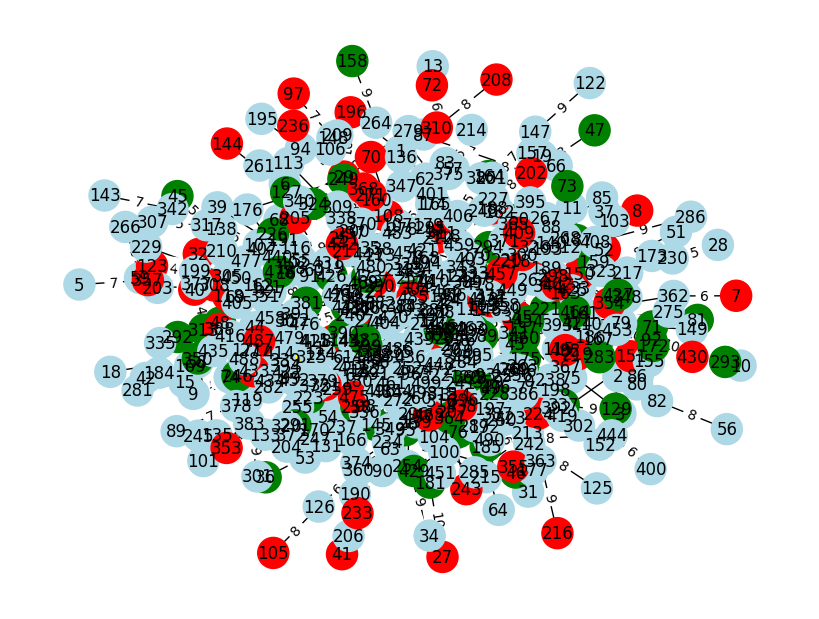

In [66]:
nodes = 500
n_cars = 70
n_boxes = 70
seed = random.randint(1,10)
probability = 0.001
G = gnp_random_connected_graph(nodes,probability)
color_map, cars, boxes, delivery = color_graph_by_type(nodes, n_cars, n_boxes)
weights = nx.get_edge_attributes(G,'weight')
pos=graphviz_layout(G)
plt.figure(figsize=(8,6))
nx.draw(G, pos, node_color=color_map,
        with_labels=True,
        node_size=500)

nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)


In [67]:
l, d = nx.single_source_dijkstra(G, delivery,boxes[0])
print("Dijkstra's shortest path")
for i in d:
  print(i, "->", end= " ")
print("Total cost = ",l)

Dijkstra's shortest path
394 -> 422 -> 486 -> 485 -> 464 -> 362 -> 7 -> Total cost =  41


In [68]:
length, path = nx.single_source_dijkstra(G, delivery)
max_length = max(length.values())
print(max_length)

55


In [69]:
matrix = []
m_path = []
for box in boxes:
  line = []
  line_path = []
  for car in cars:
    l, p = nx.single_source_dijkstra(G, car, box)
    dist = l + length[box]
    path_delivery_box = path[box][:-1]
    total_path = p + path_delivery_box[::-1]

    car_autonomy = G.nodes[car]['autonomy']
    # print(car_autonomy)
    car_autonomy = (car_autonomy - l) + (car_autonomy/(G.nodes[box]['mass'])**2 )
    # print(dist, car_autonomy)
    if dist > car_autonomy:
      dist = length[car] + 2* length[box]
      total_path = path[car][::-1][:-1] + path[box]+ path_delivery_box[::-1]
      print(f"car {car} will recharge")
    # print(f"car {car} is {l}m from box {box}, which is {length[box]}m to delivery, total = {dist}")


    line.append(dist)
    line_path.append(total_path)

  matrix.append(line)
  m_path.append(line_path)

In [70]:
arr = dlib.matrix(matrix)

arr_hungarian = dlib.matrix(matrix)
assignment = minCost(arr_hungarian)

---------
80  98  99  96  92  90  89  68  92  89 100  99  88  75  89  96  87  85 112  96  87  90 100  82  79  99  94  96  85  87  83  85  93  88  89  81  72  78  92  79  89  97 103  88  84  87  90  84  87  84  92  96  83  66  90  88  88  88  79  89  82  90  84  87  86  55  76  87  85  80 
 69  93  89  79  63  85  76  67  87  79  88  82  77  58  88  84  71  80  99  79  75  73  83  77  72  82  83  79  68  72  78  81  76  80  82  71  69  72  80  75  82  87  91  71  73  70  80  82  74  69  75  85  78  77  81  76  78  78  74  72  65  79  67  75  74  68  75  75  79  68 
 51  65  66  61  65  56  46  57  59  55  60  54  55  40  60  56  43  52  71  47  57  47  55  49  43  54  51  47  57  42  50  56  56  60  42  55  50  44  52  47  60  59  63  39  43  30  62  56  46  39  49  56  40  49  53  48  50  38  48  51  55  61  47  47  46  58  47  54  51  40 
 41  55  54  51  55  45  38  47  49  45  50  42  47  30  49  46  33  42  61  41  47  43  43  39  45  50  45  41  47  34  40  51  46  50  44  48  40 

In [71]:
print(cars)
print(boxes)

[17, 36, 45, 46, 47, 48, 50, 71, 73, 76, 81, 92, 95, 109, 127, 129, 142, 145, 158, 159, 164, 167, 172, 175, 180, 181, 185, 187, 192, 220, 221, 223, 226, 246, 249, 258, 263, 265, 283, 289, 291, 292, 293, 294, 299, 304, 313, 324, 331, 333, 337, 350, 352, 361, 364, 376, 381, 390, 399, 426, 427, 429, 443, 454, 460, 464, 473, 478, 482, 489]
[7, 8, 14, 24, 25, 27, 29, 32, 40, 41, 52, 70, 72, 84, 97, 105, 108, 114, 118, 121, 123, 144, 150, 151, 168, 188, 189, 196, 202, 205, 208, 212, 216, 219, 224, 231, 233, 236, 243, 271, 290, 300, 303, 306, 308, 310, 318, 321, 345, 353, 354, 355, 357, 366, 368, 388, 397, 409, 413, 430, 433, 438, 442, 457, 462, 468, 475, 485, 487, 492]


In [72]:
total_cost = 0
# assignment = [7, 6, 4, 5, 1, 3, 0, 2]
for i in range(len(assignment)):
  car = cars[assignment[i]]
  box = boxes[i]
  cost = arr[i][assignment[i]]
  path = m_path[i][assignment[i]]
  print(f"Car {car} will get box {box} and delivery in {delivery}")
  print(f"Cost = {cost}")
  print(f"Path = {path}")
  # total_cost += cost
total_cost = dlib.assignment_cost(arr, assignment)
print(f"Total Cost -> {total_cost}")


Car 464 will get box 7 and delivery in 394
Cost = 55.0
Path = [464, 362, 7, 362, 464, 485, 486, 422, 394]
Car 192 will get box 8 and delivery in 394
Cost = 68.0
Path = [192, 367, 449, 193, 8, 193, 449, 382, 306, 366, 447, 476, 339, 394]
Car 390 will get box 14 and delivery in 394
Cost = 38.0
Path = [390, 14, 410, 466, 141, 22, 4, 142, 277, 394]
Car 187 will get box 24 and delivery in 394
Cost = 41.0
Path = [187, 262, 474, 466, 141, 22, 24, 22, 4, 142, 277, 394]
Car 364 will get box 25 and delivery in 394
Cost = 38.0
Path = [364, 207, 276, 239, 20, 256, 269, 470, 25, 396, 223, 99, 422, 394]
Car 181 will get box 27 and delivery in 394
Cost = 55.0
Path = [181, 27, 181, 437, 455, 396, 223, 99, 422, 394]
Car 220 will get box 29 and delivery in 394
Cost = 62.0
Path = [220, 389, 417, 333, 318, 297, 29, 297, 251, 442, 469, 485, 486, 422, 394]
Car 350 will get box 32 and delivery in 394
Cost = 50.0
Path = [350, 171, 277, 394, 339, 476, 327, 121, 162, 32, 162, 121, 327, 476, 339, 394]
Car 313 wi

[0, 2, 11, 33, 36, 66, 5041, 14541]
[4549.0, 4474.0, 4448.0, 4417.0, 4415.0, 4362.0, 4295.0, 4267.0]
4267.0
3906.0


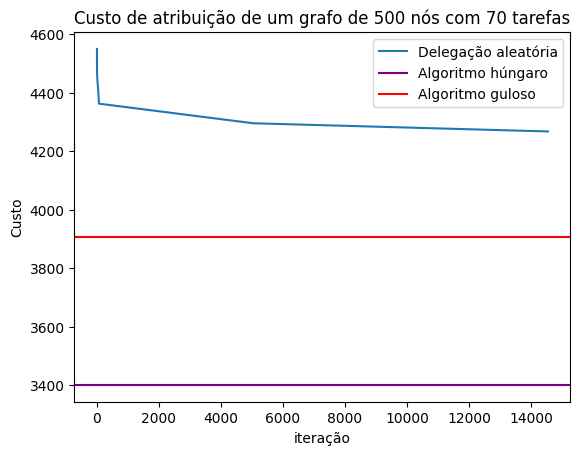

In [73]:
assignment_mock = [i for i in range(n_cars)]
plt.figure()
cost = []
x = []
min_value = 999999
for i in range(100000):
  random.shuffle(assignment_mock)
  arr_mock = dlib.matrix(matrix)
  cost_mock = dlib.assignment_cost(arr_mock, assignment_mock)
  # print(f"Custo total -> {cost_mock}")
  if cost_mock < min_value:
    cost.append(cost_mock)
    x.append(i)
    min_value = cost_mock
  if cost_mock < total_cost:
    print(arr_mock)
    print(assignment_mock)

assignment_close = []
transpose = np.array(arr).transpose()
arr = dlib.matrix(transpose)
for i in range(n_cars):
  line = list(arr[i])
  sorted_line = sorted(line)
  for j in range(len(line)):
    idx = line.index(sorted_line[j])
    if idx not in assignment_close:
      assignment_close.append(idx)
      break
cost_close = dlib.assignment_cost(arr, assignment_close)

cost = sorted(cost)[::-1]
print(x)
print(cost)
plt.title(f'Custo de atribuição de um grafo de {nodes} nós com {n_cars} tarefas')
plt.xlabel('iteração')
plt.ylabel('Custo')
plt.plot(x,cost, label='Delegação aleatória')
plt.axhline(y= total_cost, color='purple', linestyle='-', label= 'Algoritmo húngaro')
plt.axhline(y= cost_close, color='r', linestyle='-', label= 'Algoritmo guloso')
print(min_value)
print(cost_close)
plt.legend()
plt.show()
